# Joining Data


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First I import the cell phones data again and do the same functions as in HW3 to clean the data.

In [91]:
df_cell_phones = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/cell_phones_total.csv")

In [92]:
# Function to convert strings to integers
def string_to_int(value):
    try:
        if isinstance(value, str):
            if 'k' in value:  # Convert 'k' to 1e3
                return float(value.replace('k', '')) * 1e3
            elif 'M' in value:  # Convert 'M' to 1e6
                return float(value.replace('M', '')) * 1e6
            elif 'B' in value:  # Convert 'B' to 1e9
                return float(value.replace('B', '')) * 1e9
            elif value.isdigit():  # Handle plain numeric strings
                return float(value)
            else:
                # Leave unexpected strings as NaN
                return np.nan
        elif pd.isnull(value):  # Retain NaN values
            return np.nan
        else:
            return value  # Return as-is for numeric inputs
    except (ValueError, TypeError):
        # Handle any unexpected errors in conversion
        return np.nan

# Exclude "iso-3" column from conversion
df_cell_phones_numeric = df_cell_phones.copy()
for col in df_cell_phones_numeric.columns:
    if col != "iso-3":  # Apply conversion to all columns except "iso-3"
        df_cell_phones_numeric[col] = df_cell_phones_numeric[col].apply(string_to_int)

In [151]:
# Forward fill NaN values in each row (country), across columns (years)
df_filled = df_cell_phones_numeric.ffill(axis=1)  # Fill along rows (i.e., years)

# Convert all columns except 'iso-3' to numeric, non-numeric values will become NaN
df_filled.iloc[:, 1:] = df_filled.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Convert all columns except 'iso-3' to numeric, non-numeric values will become NaN
for col in df_filled.columns[1:]:  # Skip the 'iso-3' column
    df_filled[col] = pd.to_numeric(df_filled[col], errors='coerce')

# Fill any remaining NaN values (e.g., for the first year or countries without data) with 0
df_filled = df_filled.fillna(0)

df_cell_phones_filled = df_filled

In [152]:
df_cell_phones_filled

,iso-3,1960,1965,1966,1967,1968,1969,1970,1971,1972,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,132000.0,132000.0,135000.0,139000.0,140000.0,141000.0,141000.0,141000.0,141000.0,141000.0
1,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10200000.0,13800000.0,15300000.0,16800000.0,18400000.0,19700000.0,21600000.0,23900000.0,22000000.0,22600000.0
2,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9400000.0,12100000.0,12800000.0,13300000.0,14100000.0,13900000.0,13000000.0,13300000.0,13300000.0,14800000.0
3,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2690000.0,3100000.0,3500000.0,3690000.0,3360000.0,3400000.0,3370000.0,3630000.0,2710000.0,2630000.0
4,AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65500.0,65000.0,63900.0,63900.0,66200.0,71300.0,76100.0,80300.0,82600.0,87900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,XKX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,562000.0,562000.0,562000.0,562000.0,562000.0,562000.0,562000.0,562000.0,562000.0,562000.0
210,YEM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11100000.0,11700000.0,13900000.0,16800000.0,17100000.0,15000000.0,16400000.0,15400000.0,15300000.0,15300000.0
211,ZAF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50400000.0,64000000.0,68400000.0,76900000.0,79300000.0,88000000.0,82400000.0,88500000.0,92400000.0,97000000.0
212,ZMB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5450000.0,8160000.0,10500000.0,10400000.0,10100000.0,11600000.0,12000000.0,13400000.0,15500000.0,17200000.0


Then I import the population data and check if there is any data that needs to be handled. The data already seem to be in the right form (float instead of strings) and by using the remove_all_nans function i found out that no rows or columns bad only NaN:s. I therefore use the df as given.

df_population has a index columns called "Unnamed: 0_population", I start with removing it.

In [153]:
df_population = pd.read_csv(
    "https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/pop_data.csv",
    index_col=0  # Treat the first column as an index and ignore it
)

In [154]:
# Reshape cell phone data to long format
df_cell_phones_long = pd.melt(
    df_cell_phones_filled,
    id_vars=['iso-3'],
    var_name='year',
    value_name='n_cellphones'
)

# Reshape population data to long format
df_population_long = pd.melt(
    df_population,
    id_vars=['iso-3'],
    var_name='year',
    value_name='population'
)

# Convert 'year' column to integer for consistency
df_cell_phones_long['year'] = df_cell_phones_long['year'].astype(int)
df_population_long['year'] = df_population_long['year'].astype(int)

# Merge the two long DataFrames
df_merged_long = pd.merge(
    df_cell_phones_long,
    df_population_long,
    on=['iso-3', 'year'],
    how='outer'  # Use 'outer' to ensure no data is dropped
)

# Replace NaN values for 'n_cellphones' with 0, I would prefer NaN but in the assignment given it was 0:s so i go with that.
df_merged_long['n_cellphones'] = df_merged_long['n_cellphones'].fillna(0)

I print the table given in the assignment. 

In [155]:
df_merged_long[df_merged_long['year'] == 1960].head()

,iso-3,year,n_cellphones,population
0,ABW,1960,0.0,54608.0
61,AFE,1960,0.0,130692579.0
122,AFG,1960,0.0,8622466.0
183,AFW,1960,0.0,97256290.0
244,AGO,1960,0.0,5357195.0


Then I import the country datafile to get the names of the countries and merged it with my big dataframe to add the names.

In [156]:
df_country = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/country_data.csv")

In [157]:
# Merge df_merged_long with df_country to add the 'country' column
df_merged_long = pd.merge(
    df_merged_long,
    df_country[['alpha-3', 'name']],  # Select relevant columns from df_country
    left_on='iso-3',  # Match 'iso-3' from df_merged_long
    right_on='alpha-3',  # Match 'alpha-3' from df_country
    how='left'  # Keep all rows from df_merged_long
)

# Rename 'names' to 'country' for clarity
df_merged_long = df_merged_long.rename(columns={'names': 'country'})

# Drop the 'alpha-3' column if it's no longer needed
df_merged_long = df_merged_long.drop(columns=['alpha-3'])

Then I add the new column describing phones per capita.

In [158]:
# Ensure population is numeric and handle any missing values
df_merged_long = df_merged_long.dropna(subset=['population'])  # Drop rows where population is NaN
df_merged_long['phones_per_capita'] = df_merged_long['n_cellphones'] / df_merged_long['population']


In [159]:
df_merged_long[df_merged_long['year'] == 1960].head()


,iso-3,year,n_cellphones,population,name,phones_per_capita
0,ABW,1960,0.0,54608.0,Aruba,0.0
61,AFE,1960,0.0,130692579.0,NaN,0.0
122,AFG,1960,0.0,8622466.0,Afghanistan,0.0
183,AFW,1960,0.0,97256290.0,NaN,0.0
244,AGO,1960,0.0,5357195.0,Angola,0.0


I now use pivot to make a new df. This df will have the years as row index, the name of the countries as column index and phones per capita as the values. 

In [160]:
df_merged_long = df_merged_long.drop_duplicates(subset=['year', 'name'])

In [161]:
# Pivot the dataframe
df_phones_per_capita = df_merged_long.pivot(
    index='year',     # Rows are years
    columns='name',  # Columns are country names
    values='phones_per_capita'  # Values are phones_per_capita
)

I then find the 5 countries with the highest phones per capita in 2019 and print a table of the last 5 years for each country.

In [162]:
# Step 1: Filter the data for the years 2015-2019
df_subset = df_phones_per_capita.loc[2015:2019]

# Step 2: Identify the top 5 countries based on phones_per_capita in 2019
top_5_countries_2019 = df_subset.loc[2019].nlargest(5).index.tolist()

# Step 3: Filter the data to include only the top 5 countries and years 2015-2019
df_top_5 = df_subset[top_5_countries_2019]

# Step 4: Print the filtered dataframe (showing the top 5 countries and years 2015-2019)
df_top_5


name,Macao,Hong Kong,United Arab Emirates,Antigua and Barbuda,Seychelles
year,,,,,
2015,3.088231,2.290401,2.007424,1.956838,1.584260
2016,3.143510,2.398931,2.212521,1.987545,1.605459
2017,3.210102,2.488773,2.183431,2.019337,1.742433
2018,3.348741,2.670209,2.199084,2.008164,1.849900
2019,3.284849,2.863650,2.127739,1.997460,1.987196


To analyze the countries with highest growth rate over the last 10 years I start with comparing 2019 with 2009. If a country had 0 phones in 2019 they are not included because that would give an infinite growth rate. I then plot the last 10 years with the countries with the highest growth rate.

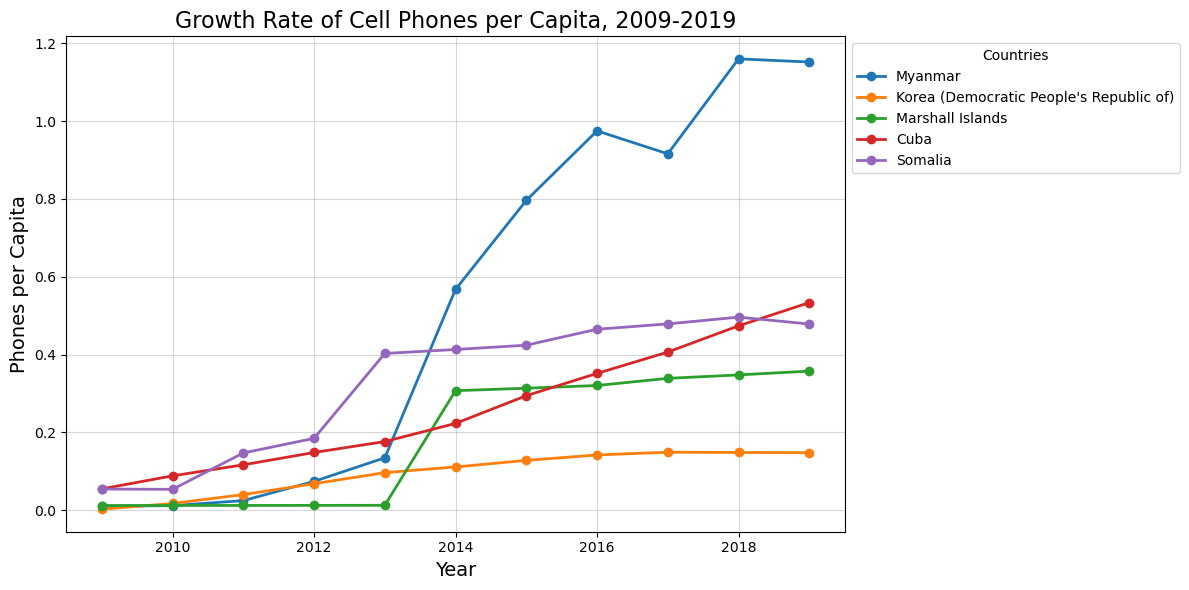

Top 5 countries with the highest growth rates over the last 10 years:
1. Myanmar: 11147.83%
2. Korea (Democratic People's Republic of): 5147.24%
3. Marshall Islands: 2804.72%
4. Cuba: 869.74%
5. Somalia: 775.97%


In [163]:
# Step 1: Subset the data for the last 10 years, excluding 2020
last_10_years = df_phones_per_capita.loc[df_phones_per_capita.index[-12:-1], :]  # Last 10 years excluding 2020

# Step 2: Calculate growth rates for each country
growth_rates = {}
for country in last_10_years.columns:
    start_value = last_10_years[country].iloc[0]
    end_value = last_10_years[country].iloc[-1]
    if start_value > 0:  # Avoid division by zero
        growth_rates[country] = (end_value - start_value) / start_value * 100
    else:
        growth_rates[country] = None  # Handle cases where the starting value is 0

# Filter out countries with no growth rates (e.g., start_value was 0)
growth_rates = {country: rate for country, rate in growth_rates.items() if rate is not None}

# Step 3: Identify the top 5 countries with the highest growth rates
top_5_countries = sorted(growth_rates, key=growth_rates.get, reverse=True)[:5]

# Step 4: Plot the growth rates of the top 5 countries over the last 10 years
plt.figure(figsize=(12, 6))
for country in top_5_countries:
    plt.plot(last_10_years.index, last_10_years[country], marker='o', label=country, linewidth=2)

# Formatting the plot
plt.title("Growth Rate of Cell Phones per Capita, 2009-2019", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Phones per Capita", fontsize=14)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Countries")
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

# Step 5: Print the top 5 countries with their growth rates
print("Top 5 countries with the highest growth rates over the last 10 years:")
for rank, country in enumerate(top_5_countries, start=1):
    print(f"{rank}. {country}: {growth_rates[country]:.2f}%")


The assignment said "That is, create a plot that illustrates the growth rate of the countries in the table above over the last 10 years." I felt the countries in the plot above made more sense then plotting the five countries from the table, but I can do that aswell. 


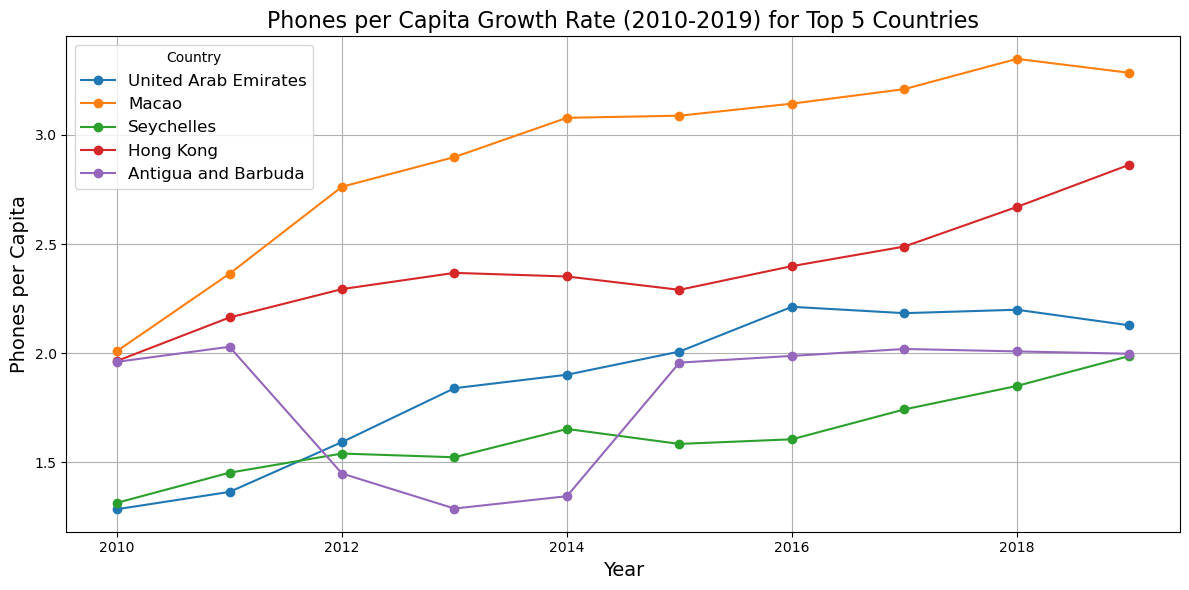

In [164]:
# Step 1: Filter df_phones_per_capita to include only countries in df_top_5
countries_top_5 = df_top_5.columns  # The countries in df_top_5

# Step 2: Select the relevant years (last 10 years excluding 2020)
years_to_consider = range(2010, 2020)  # Last 10 years excluding 2020
df_growth_top_5 = df_phones_per_capita.loc[years_to_consider, countries_top_5]

# Step 3: Calculate the growth rate for each country
growth_rate_top_5 = (
    df_growth_top_5.iloc[-1] - df_growth_top_5.iloc[0]
) / df_growth_top_5.iloc[0]

# Step 4: Identify the 5 countries with the highest growth rate
top_5_growth_countries = growth_rate_top_5.nlargest(5).index
df_growth_top_5_selected = df_growth_top_5[top_5_growth_countries]

# Step 5: Plot the growth rate for these countries
plt.figure(figsize=(12, 6))
for country in df_growth_top_5_selected.columns:
    plt.plot(df_growth_top_5_selected.index, df_growth_top_5_selected[country], marker='o', label=country)

# Step 6: Customize the plot
plt.title("Phones per Capita Growth Rate (2010-2019) for Top 5 Countries", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Phones per Capita", fontsize=14)
plt.legend(title="Country", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


The reason that for example Macao has less phones per capita in 2019 then in 2018 is acctually that in 2019 there was no answer on how many phones where in the country so we have used the number of phones for 2018. But for population there where a new answer (higher) and thats why the phones per capita seem to have decreased, but this is acctually not necessarily true.

# SQL

In [123]:
import sqlite3

In [124]:
# Connect to the SQLite database
conn = sqlite3.connect('user_actions.db')

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

In [127]:
query_task_1 = """
SELECT DISTINCT username
FROM user_actions
WHERE action = 'signup';
"""
usernames = pd.read_sql_query(query_task_1, conn)
usernames


,username
0,user34
1,user28
2,user1
3,user24
4,user15
5,user20
6,user18
7,user25
8,user3
9,user9


In [128]:
query_task_2 = """
SELECT user_id, username, COUNT(*) AS log_count
FROM user_actions
GROUP BY user_id, username;
"""
log_counts = pd.read_sql_query(query_task_2, conn)
log_counts


,user_id,username,log_count
0,1,user1,104
1,2,user2,149
2,3,user3,108
3,4,user4,436
4,5,user5,192
5,6,user6,457
6,7,user7,362
7,8,user8,329
8,9,user9,118
9,10,user10,170


In [129]:
query_task_3 = """
SELECT DISTINCT ua1.user_id, ua1.username
FROM user_actions ua1
JOIN user_actions ua2
  ON ua1.user_id = ua2.user_id 
     AND ua1.action = 'login' 
     AND ua2.action = 'signup'
     AND DATE(ua1.timestamp) = DATE(ua2.timestamp);
"""
users_same_day = pd.read_sql_query(query_task_3, conn)
users_same_day

,user_id,username
0,8,user8
1,12,user12
2,30,user30
3,7,user7
4,22,user22
5,5,user5
6,2,user2
7,32,user32


In [130]:
conn.close()

# Regex

In [134]:
import re

First read the txt file and save the comments one by one.

In [133]:
# Load the file into a list of comments
with open('comments.txt', 'r') as file:
    comments = file.readlines()

I then make a function that can find a pattern (in this case a hashtag) in one comment.

In [137]:
# Function to extract hashtags
def extract_hashtags(comment):
    return re.findall(r'#\w+', comment)

# Example: Extract hashtags from the first comment
hashtags_comment_1 = extract_hashtags(comments[0])
hashtags_comment_1

['#programming', '#tips']

I then make a function that checks if a comment contains a pattern (in this case two specific hashtags).

In [139]:
# Function to check for both hashtags
def has_both_tags(comment):
    pattern = r'(?=.*#programming)(?=.*#python).*'
    return re.match(pattern, comment, re.IGNORECASE) is not None

# Example: Check if the second comment matches
comment_2_matches = has_both_tags(comments[1])  # Assuming the second comment is at index 1
comment_2_matches

False

False means that both these hashtags are not in the second comment. I make an extra function to check if and which comments include both these hashtags:

In [140]:
# Apply function to all comments
results = [comment for comment in comments if has_both_tags(comment)]

# Print comments that include both hashtags
print("Comments with both hashtags:")
for comment in results:
    print(comment)

Comments with both hashtags:
6. "I learned a lot. #programming #python #tips"

15. "Well explained. #programming #python #tips"

21. "Love the content! #programming #python #tips"

30. "Inspired by the tips. #programming #python #tips"



I then make a function that can find a special pattern, in this case a hashtag, and save them in a set. 

In [143]:
# Function to extract all hashtags from the list of comments
def extract_unique_hashtags(comments):
    hashtags = set()  # Use a set to store unique hashtags
    pattern = r'#\w+'  # This will match hashtags that start with # followed by one or more word characters
    
    # Loop through each comment in the list
    for comment in comments:
        # Find all hashtags in the current comment
        found_hashtags = re.findall(pattern, comment)
        # Add found hashtags to the set (duplicates will be automatically ignored)
        hashtags.update(found_hashtags)
    
    return hashtags

# Extract unique hashtags
unique_hashtags = extract_unique_hashtags(comments)

# Print the unique hashtags
print("Unique hashtags found in the comments:")
for hashtag in unique_hashtags: print(hashtag)

Unique hashtags found in the comments:
#insights
#programming
#analysis
#tips
#python
#analytics
#research
#coding
#tech
#innovation
#data
